<a href="https://colab.research.google.com/github/rnzyadty/Portofolio/blob/main/Selamat_Datang_di_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install OpenCV dan matplotlib
!pip install opencv-python matplotlib


In [23]:
from google.colab import files
uploaded = files.upload()


Saving f3.png to f3 (1).png


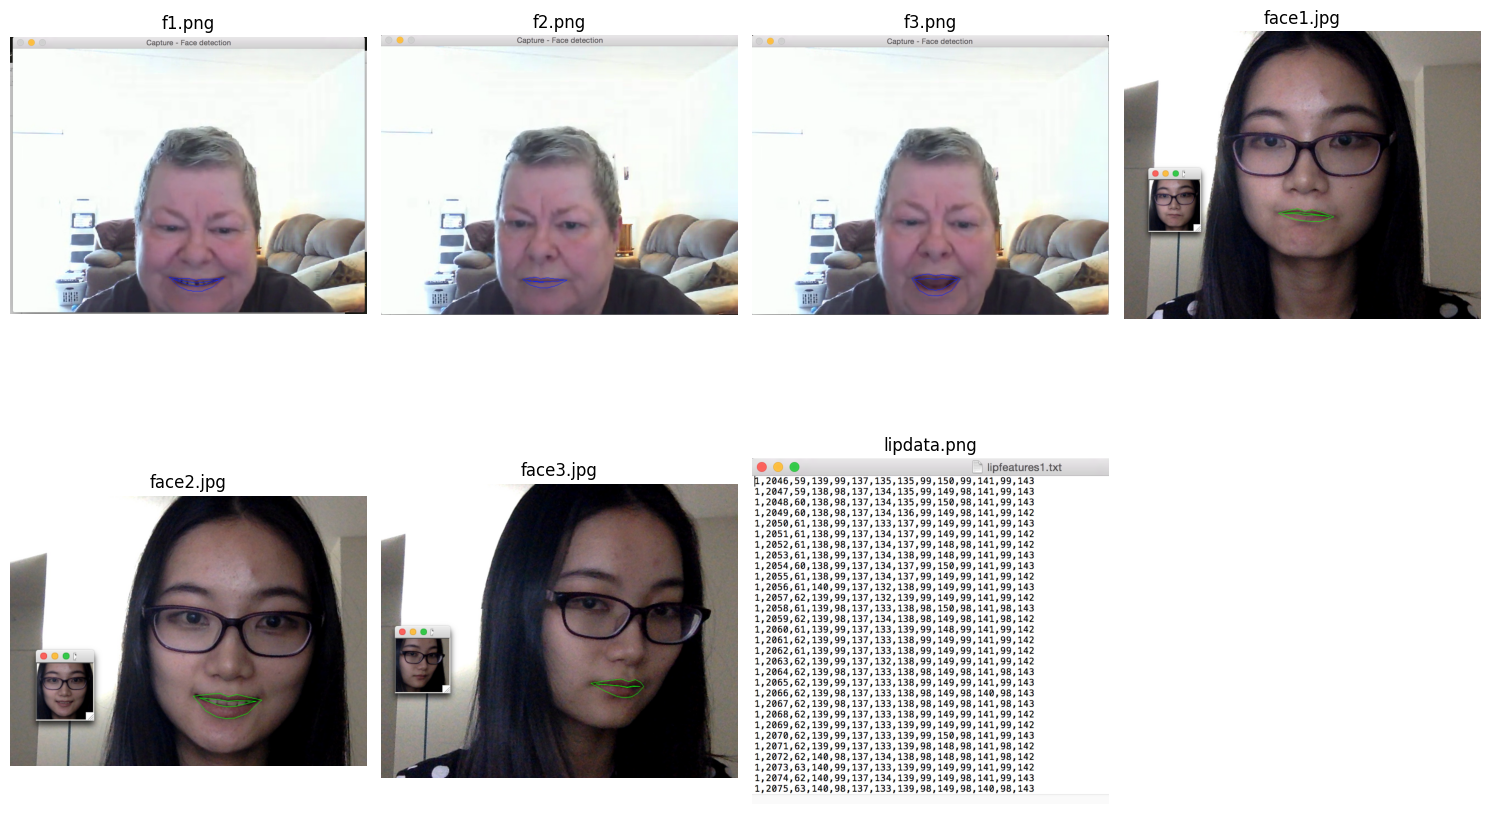

In [24]:
import matplotlib.pyplot as plt
import cv2
import os

# List gambar (bisa disesuaikan)
image_files = ['f1.png', 'f2.png', 'f3.png', 'face1.jpg', 'face2.jpg', 'face3.jpg', 'lipdata.png']

# Tampilkan dalam grid
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(image_files):
    if os.path.exists(img_file):
        img = cv2.imread(img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
plt.tight_layout()
plt.show()


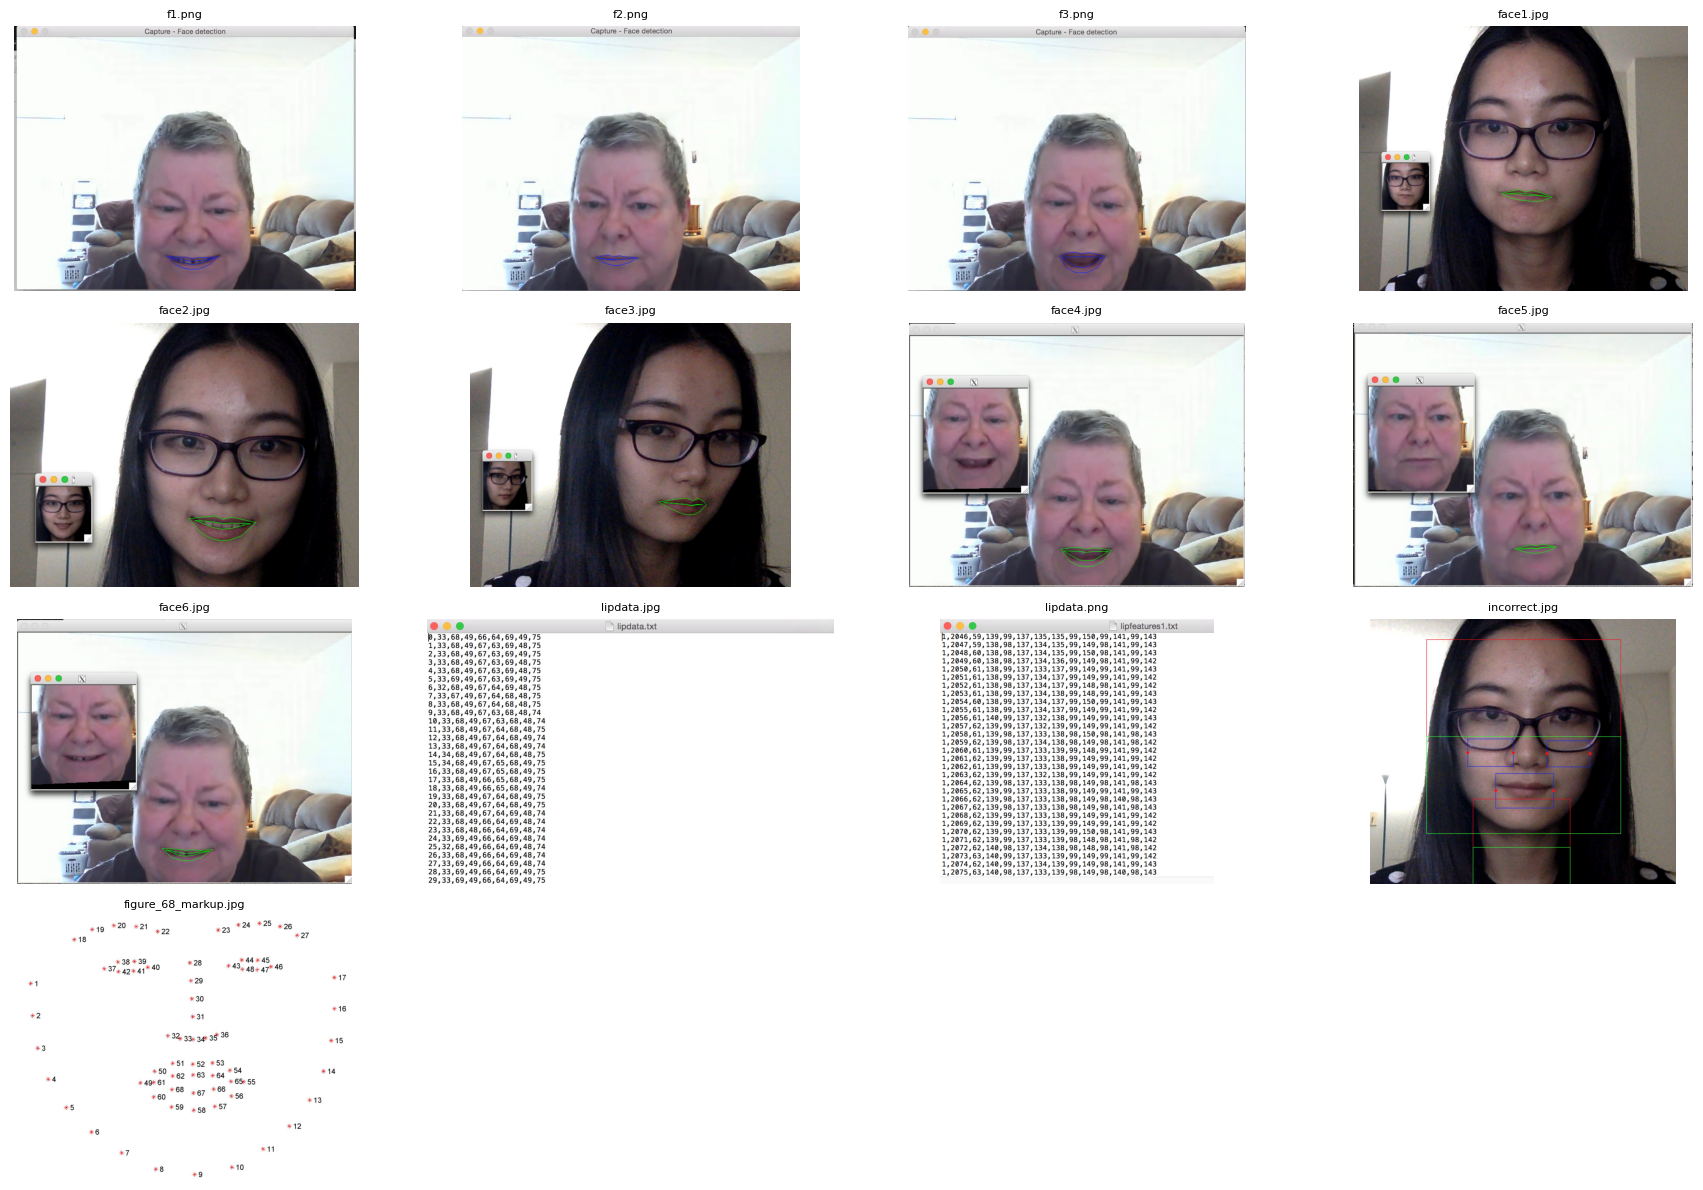

In [25]:
import matplotlib.pyplot as plt
import cv2
import os

# Daftar file gambar yang mau ditampilkan
image_files = [
    'f1.png', 'f2.png', 'f3.png',
    'face1.jpg', 'face2.jpg', 'face3.jpg', 'face4.jpg',
    'face5.jpg', 'face6.jpg',
    'lipdata.jpg', 'lipdata.png',
    'incorrect.jpg', 'figure_68_markup.jpg'
]

# Tampilkan dalam grid
plt.figure(figsize=(18, 12))
for i, img_file in enumerate(image_files):
    if os.path.exists(img_file):
        img = cv2.imread(img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')
    else:
        print(f"File not found: {img_file}")
plt.tight_layout()
plt.show()


In [26]:
# Download model landmark wajah dari dlib
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2025-07-08 13:32:09--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-07-08 13:32:09--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  35.0MB/s    in 1.7s    

2025-07-08 13:32:11 (35.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [27]:
!apt-get install cmake -y
!apt-get install libboost-all-dev -y
!pip install dlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


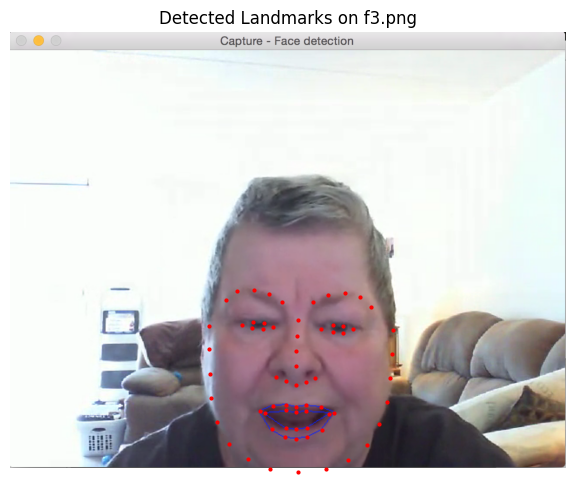

In [28]:
import dlib
import cv2
import matplotlib.pyplot as plt

# Load model dan detektor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Ganti dengan gambar yang mau kamu analisis
img_path = "f3.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Deteksi wajah
faces = detector(img_rgb)

# Tampilkan gambar
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
for face in faces:
    landmarks = predictor(img_rgb, face)
    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        plt.plot(x, y, 'ro', markersize=2)
plt.title(f"Detected Landmarks on {img_path}")
plt.axis("off")
plt.show()


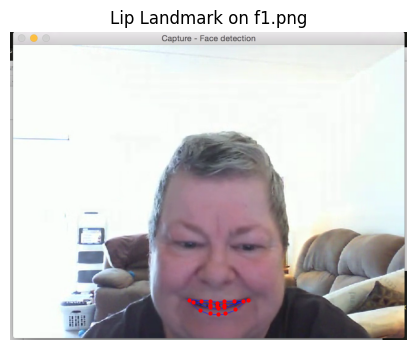

f1.png → Width: 192.01 px | Height: 36.06 px


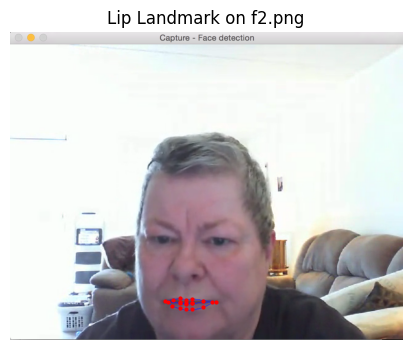

f2.png → Width: 166.01 px | Height: 30.02 px


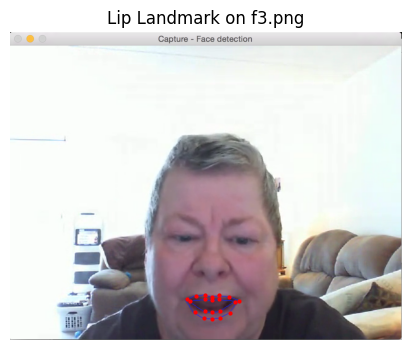

f3.png → Width: 170.07 px | Height: 72.01 px


In [29]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load Dlib model
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Daftar gambar (bisa diganti sesuai upload)
image_files = ['f1.png', 'f2.png', 'f3.png']

# Simpan hasil fitur (lebar dan tinggi bibir)
lip_features = []

for img_path in image_files:
    if not os.path.exists(img_path):
        print(f"[SKIP] File not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = detector(img_rgb)

    if len(faces) == 0:
        print(f"[SKIP] No face detected in {img_path}")
        continue

    for face in faces:
        shape = predictor(img_rgb, face)
        lip_points = [(shape.part(i).x, shape.part(i).y) for i in range(48, 68)]
        lip_array = np.array(lip_points)

        # Plot titik bibir
        plt.figure(figsize=(6, 4))
        plt.imshow(img_rgb)
        plt.plot(lip_array[:, 0], lip_array[:, 1], 'ro', markersize=2)
        plt.title(f"Lip Landmark on {img_path}")
        plt.axis('off')
        plt.show()

        # Hitung fitur: lebar & tinggi bibir
        lip_width = np.linalg.norm(lip_array[6] - lip_array[0])
        lip_height = np.linalg.norm(lip_array[9] - lip_array[3])

        print(f"{img_path} → Width: {lip_width:.2f} px | Height: {lip_height:.2f} px")
        lip_features.append([img_path, lip_width, lip_height])


In [30]:
import pandas as pd

# Simpan ke DataFrame dan ekspor ke CSV
df = pd.DataFrame(lip_features, columns=["Filename", "Lip_Width", "Lip_Height"])
df.to_csv("lip_features.csv", index=False)

print("\n✅ Data fitur bibir berhasil disimpan ke 'lip_features.csv'")
display(df)



✅ Data fitur bibir berhasil disimpan ke 'lip_features.csv'


Filename   Lip_Width  Lip_Height
0   f1.png  192.010416   36.055513
1   f2.png  166.012048   30.016662
2   f3.png  170.073514   72.006944

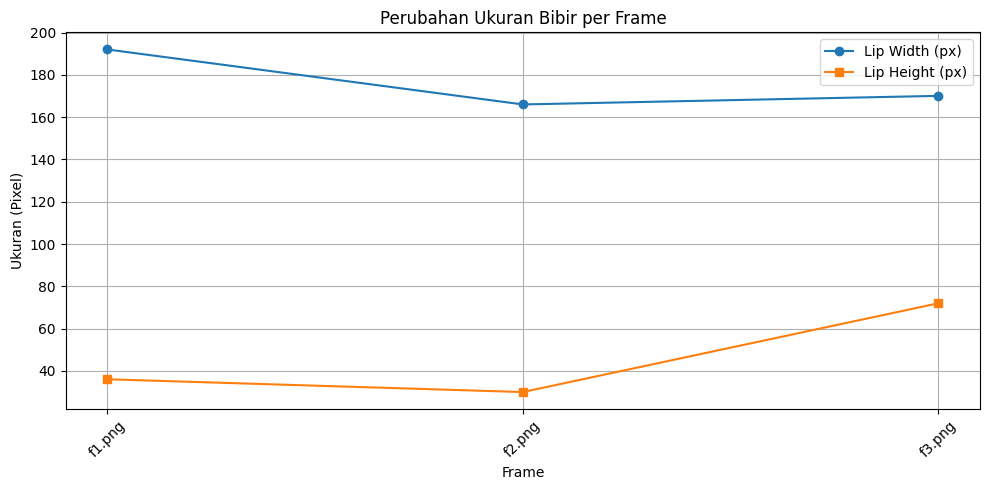

In [31]:
# Visualisasi perubahan lip width dan height
plt.figure(figsize=(10, 5))

plt.plot(df["Lip_Width"], marker='o', label='Lip Width (px)')
plt.plot(df["Lip_Height"], marker='s', label='Lip Height (px)')
plt.xticks(ticks=range(len(df)), labels=df["Filename"], rotation=45)
plt.title("Perubahan Ukuran Bibir per Frame")
plt.xlabel("Frame")
plt.ylabel("Ukuran (Pixel)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Hitung perubahan lebar & tinggi antar frame (selisih absolut)
df["Δ_Width"] = df["Lip_Width"].diff().abs()
df["Δ_Height"] = df["Lip_Height"].diff().abs()

# Tampilkan
display(df)


Filename   Lip_Width  Lip_Height    Δ_Width   Δ_Height
0   f1.png  192.010416   36.055513        NaN        NaN
1   f2.png  166.012048   30.016662  25.998369   6.038851
2   f3.png  170.073514   72.006944   4.061466  41.990282

In [33]:
df["Label"] = ["normal", "normal", "bohong"]  # Contoh (manual)
